In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
titanic_df=pd.read_csv('train.csv') 

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
columns_to_drop=['PassengerId', 'Name', 'Cabin', 'Embarked', 'Age', 'Ticket']

In [6]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df=titanic_df.drop(columns_to_drop, axis=1)

In [8]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [9]:
titanic_df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,2,1,0,71.2833
2,1,3,2,0,0,7.9250
3,1,1,2,1,0,53.1000
4,0,3,1,0,0,8.0500


In [10]:
titanic_df.fillna(0)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,2,1,0,71.2833
2,1,3,2,0,0,7.9250
3,1,1,2,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,2,0,0,30.0000
888,0,3,2,1,2,23.4500
889,1,1,1,0,0,30.0000


<Axes: >

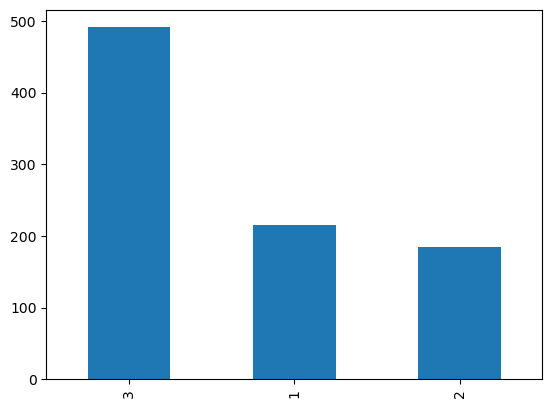

In [11]:
titanic_df['Pclass'].value_counts().plot(kind='bar')

<Axes: >

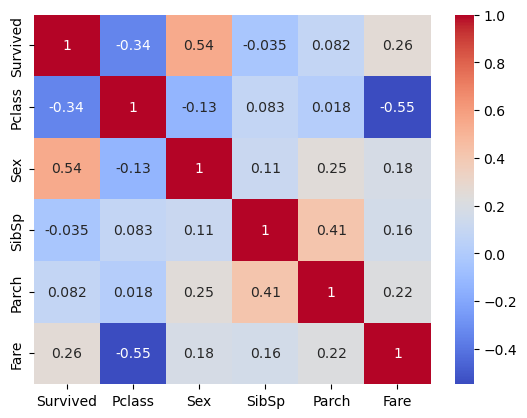

In [12]:
# Create a correlation matrix
corr_matrix = titanic_df.corr()



# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

In [13]:
Y=titanic_df['Survived']

In [14]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
X=titanic_df.drop('Survived', axis=1)

In [16]:
X

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,7.2500
1,1,2,1,0,71.2833
2,3,2,0,0,7.9250
3,1,2,1,0,53.1000
4,3,1,0,0,8.0500
...,...,...,...,...,...
886,2,1,0,0,13.0000
887,1,2,0,0,30.0000
888,3,2,1,2,23.4500
889,1,1,0,0,30.0000


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

In [20]:
log_model=LogisticRegression()

In [21]:
X_train

,Pclass,Sex,SibSp,Parch,Fare
520,1,2,0,0,93.5000
510,3,1,0,0,7.7500
446,2,2,0,1,19.5000
2,3,2,0,0,7.9250
691,3,2,0,1,13.4167
...,...,...,...,...,...
575,3,1,0,0,14.5000
838,3,1,0,0,56.4958
337,1,2,0,0,134.5000
523,1,2,0,1,57.9792


In [22]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
predict=log_model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.78      0.64      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



## print(classification_report(y_test,predict))